<a href="https://colab.research.google.com/github/Strangeabhi/ML-2025/blob/main/K_Folds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd # Import pandas to use dropna()

# Separate features (X) and target (y)
X = uploaded_df.drop('Class', axis=1)
y = uploaded_df['Class']

# Drop rows with NaN values in the target variable
df_cleaned = uploaded_df.dropna(subset=['Class'])
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']


kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

all_predictions = []
all_true_labels = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    predictions = rf_classifier.predict(X_test)

    all_predictions.extend(predictions)
    all_true_labels.extend(y_test)

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

print(f"Total predictions across all folds: {len(all_predictions)}")
print(f"Total true labels across all folds: {len(all_true_labels)}")

Total predictions across all folds: 87239
Total true labels across all folds: 87239


Visualizations


Model Training

In [23]:
import pandas as pd
import os

# Assuming the uploaded file is a CSV, replace 'your_uploaded_dataset.csv' with the correct filename
uploaded_df = pd.read_csv('/content/creditcard.csv')
print("\nDataset loaded successfully:")
display(uploaded_df.head())
print(f"\nShape of the DataFrame: {uploaded_df.shape}")


Dataset loaded successfully:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Shape of the DataFrame: (284807, 31)


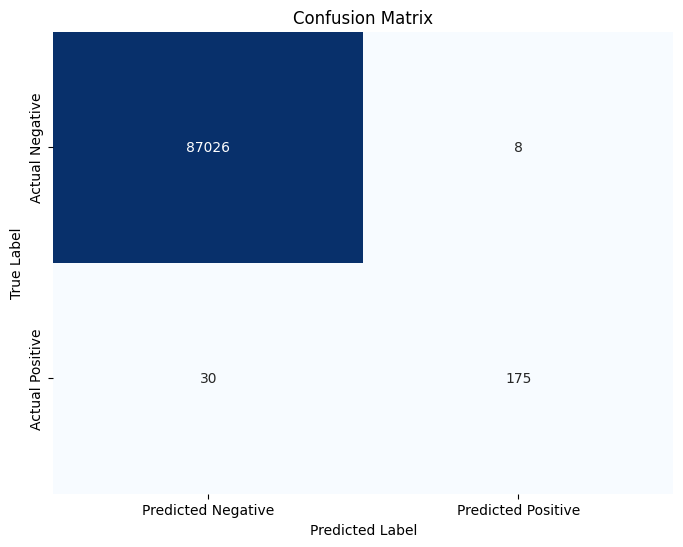

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

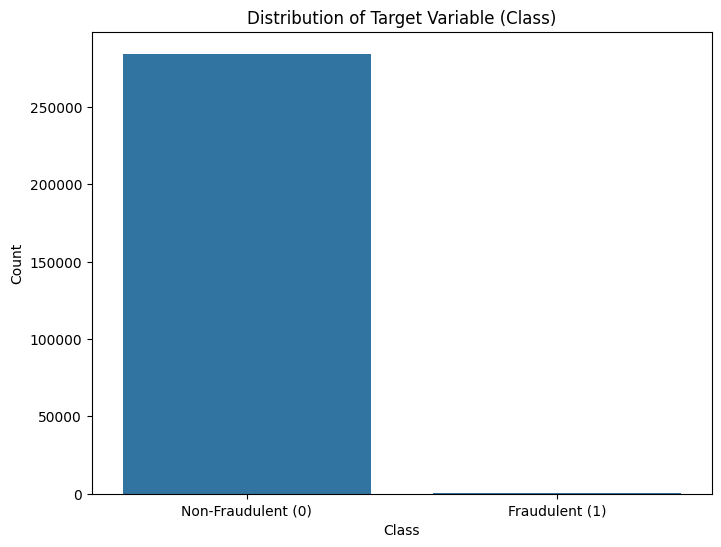

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each class in the target variable
class_counts = uploaded_df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

Data Preps

Model Training

In [26]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

all_predictions = []
all_true_labels = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    predictions = rf_classifier.predict(X_test)

    # Extend lists
    all_predictions.extend(predictions)
    all_true_labels.extend(y_test)

# Convert lists to NumPy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

print(f"Total predictions across all folds: {len(all_predictions)}")
print(f"Total true labels across all folds: {len(all_true_labels)}")

Total predictions across all folds: 48842
Total true labels across all folds: 48842


Evaluate

In [27]:
accuracy = accuracy_score(all_true_labels, all_predictions)
precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8536
Precision: 0.8479
Recall: 0.8536
F1 Score: 0.8493
